In [1]:
from pydub import AudioSegment
from pydub.playback import play

import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 音楽データの読み込み
sound = AudioSegment.from_mp3("data/ambulance12.mp3")

# NumPy配列に返還
data = np.array(sound.get_array_of_samples())

# ステレオ音声から片方を抽出

print("再生時間は{}[秒]".format(sound.duration_seconds)) # 再生時間(秒)
print("サンプリングレートは{}[Hz]".format(sound.frame_rate))  # サンプリングレート(Hz)
print("チャンネル数は{}[ch]".format(sound.channels))  # チャンネル数(1:mono, 2:stereo)

再生時間は730.9013333333334[秒]
サンプリングレートは48000[Hz]
チャンネル数は2[ch]


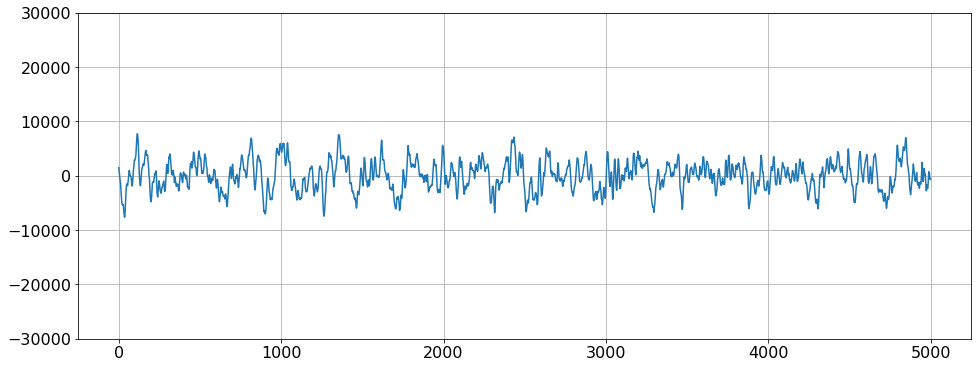

(2401,) (601,) (2401, 601)


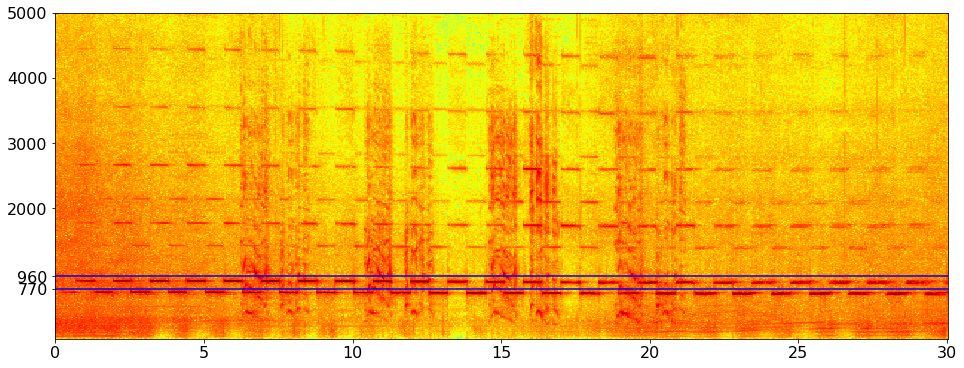

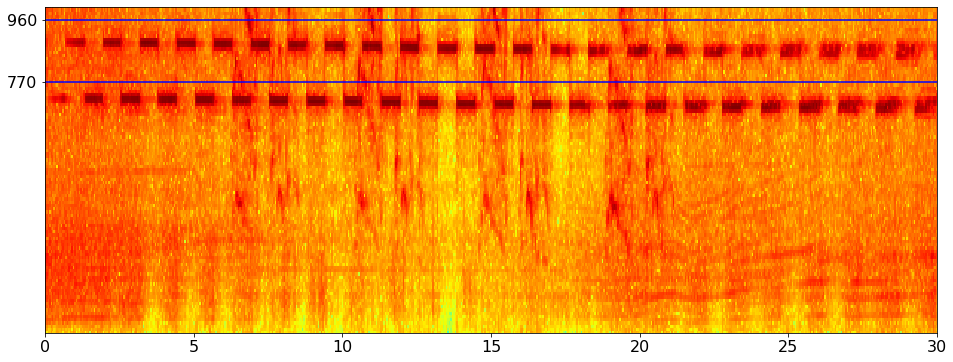

(2401,) (601,) (2401, 601)


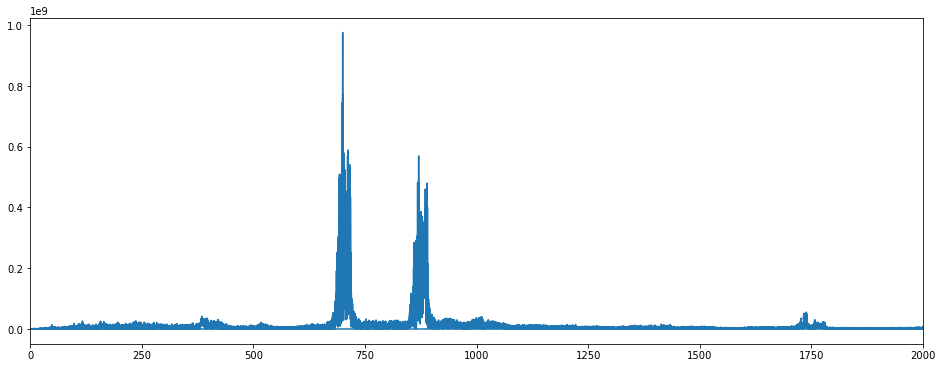

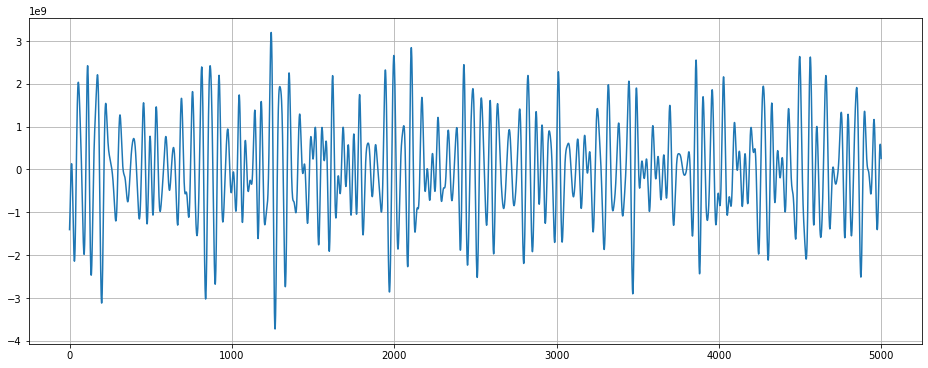

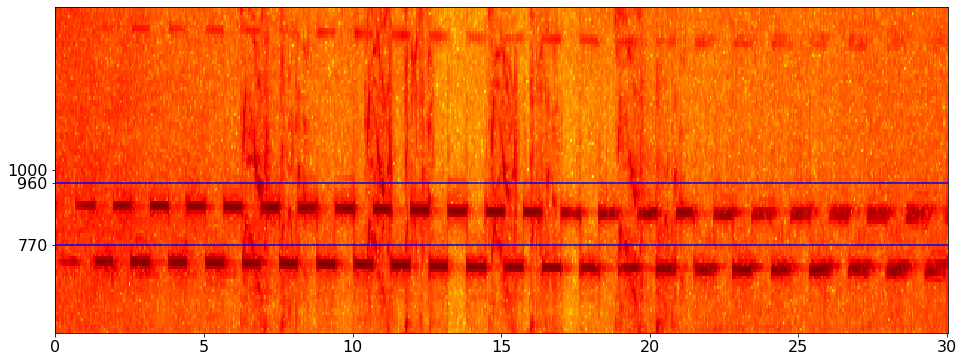

In [22]:
time = 314 #@param {type:"slider", min:0, max:730, step:1}
ran = 30 #[s]範囲 

x = data[::sound.channels]

p = int(time*sound.frame_rate)
r = int(ran*sound.frame_rate)

x = x[p:p+r]
# グラフ化
plt.figure(figsize=(16,6))
plt.plot(x[:5000])
plt.yticks([30000,20000,10000,0,-10000,-20000,-30000])

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid()
plt.show()

#0-5000#
frq, t, Pxx = scipy.signal.stft(x, fs=48000, nperseg=4800, noverlap=2400) #周波数、時間、強さの3つの情報が帰ってくる
print(frq.shape,t.shape,Pxx.shape)
Pxx = 10 * np.log(np.abs(Pxx)) #対数表示に直す

plt.figure(figsize=(16,6))
plt.ylim(0,5000)
plt.yticks([770,960,2000,3000,4000,5000])

plt.axhline(y=960,color="blue")
plt.axhline(y=770,color="blue")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.pcolormesh(t, frq, Pxx, cmap = 'jet')
plt.show()


#0-1000#
plt.figure(figsize=(16,6))
plt.ylim(0,1000)
plt.yticks([770,960])

plt.axhline(y=960,color="blue")
plt.axhline(y=770,color="blue")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.pcolormesh(t, frq, Pxx, cmap = 'jet')
plt.show()

#FFT#

plt.figure(figsize=(16,6))

F = np.fft.fft(x - np.mean(x))
F2 = F.copy()
freq = np.fft.fftfreq(len(x), d=1/sound.frame_rate)
Amp = np.abs(F)

plt.plot(freq,Amp)
plt.xlim(0,2000)

#bandpass_filter#

fcut_h = 1500
fcut_l = 500

plt.figure(figsize=(16,6))

F2[(freq > fcut_h)] = 0
F2[(freq <= fcut_l)] = 0

f2 = np.fft.ifft(F2)
f2 = np.real(f2*len(x))

plt.grid()
plt.plot(f2[:5000])

#0-1000#
frq, t, Pxx = scipy.signal.stft(f2, fs=48000, nperseg=4800, noverlap=2400) #周波数、時間、強さの3つの情報が帰ってくる
print(frq.shape,t.shape,Pxx.shape)
Pxx = 10 * np.log(np.abs(Pxx)) #対数表示に直す

plt.figure(figsize=(16,6))
plt.ylim(500,1500)
plt.yticks([770,960,1000])

plt.axhline(y=960,color="blue")
plt.axhline(y=770,color="blue")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.pcolormesh(t, frq, Pxx, cmap = 'jet')
plt.show()


In [7]:
freq

array([ 0.00000000e+00,  3.47222222e-05,  6.94444444e-05, ...,
       -1.04166667e-04, -6.94444444e-05, -3.47222222e-05])

In [50]:
frq, t, Pxx = scipy.signal.stft(x, fs=48000, nperseg=4800, noverlap=2400) #周波数、時間、強さの3つの情報が帰ってくる
print(frq.shape,t.shape,Pxx.shape)
Pxx = 10 * np.log(np.abs(Pxx)) #対数表示に直す

(2401,) (601,) (2401, 601)


In [51]:
Pxx.shape

(2401, 601)

(2401,) (601,) (2401, 601)


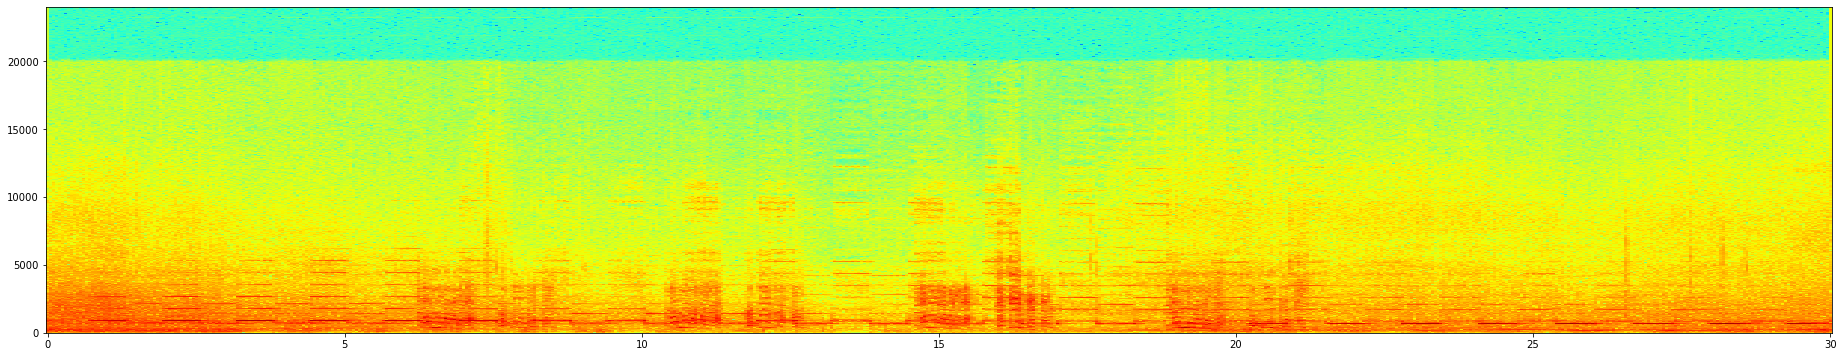

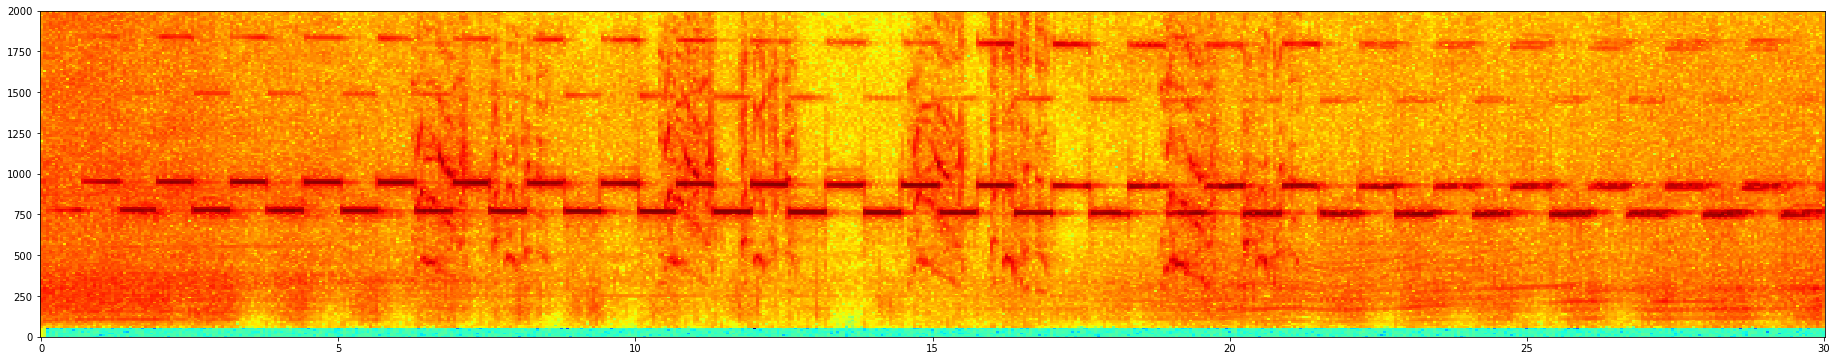

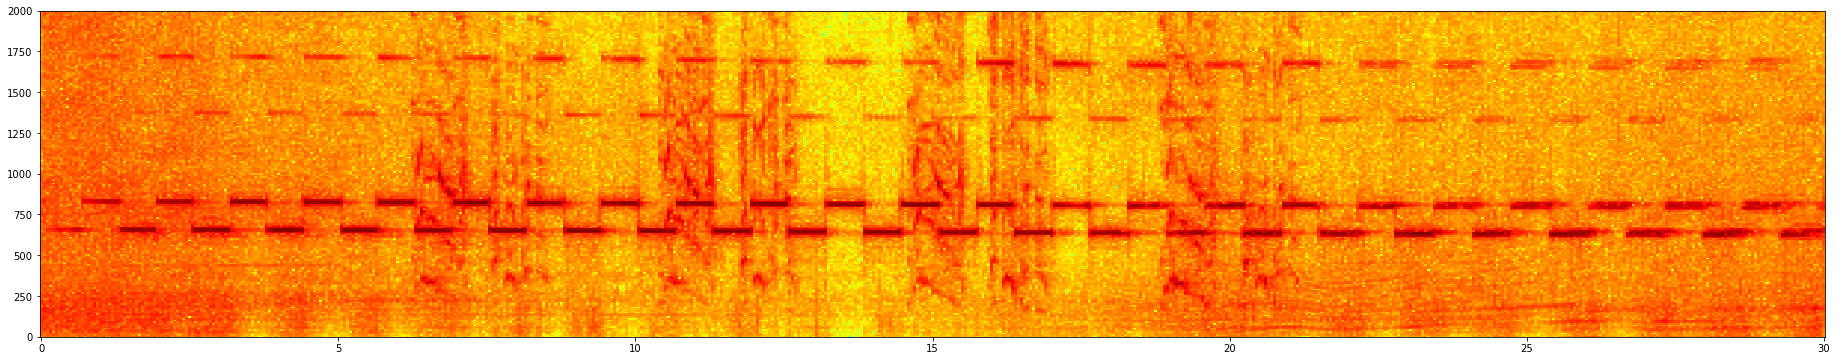

In [52]:
frq, t_ori, Pxx = scipy.signal.stft(x, fs=48000, nperseg=4800, noverlap=2400) #周波数、時間、強さの3つの情報が帰ってくる
print(frq.shape,t.shape,Pxx.shape)
Pxx = 10 * np.log(np.abs(Pxx)) #対数表示に直す


plt.figure(figsize=(32,6))
#plt.ylim(0,2000)
plt.pcolormesh(t_ori, frq, Pxx, cmap = 'jet')

frq, t_ori, Pxx = scipy.signal.stft(x, fs=48000, nperseg=4800, noverlap=2400) #周波数、時間、強さの3つの情報が帰ってくる

Pxx = 10 * np.log(np.abs(Pxx)) #対数表示に直す
Pxx = np.roll(Pxx.T, 6)

plt.figure(figsize=(32,6))
plt.ylim(0,2000)
plt.pcolormesh(t_ori, frq, Pxx.T, cmap = 'jet')

frq, t, Pxx = scipy.signal.stft(x, fs=48000, nperseg=4800, noverlap=2400) #周波数、時間、強さの3つの情報が帰ってくる

Pxx = 10 * np.log(np.abs(Pxx)) #対数表示に直す
Pxx = np.roll(Pxx.T, -6)

plt.figure(figsize=(32,6))
plt.ylim(0,2000)
plt.pcolormesh(t_ori, frq, Pxx.T, cmap = 'jet')

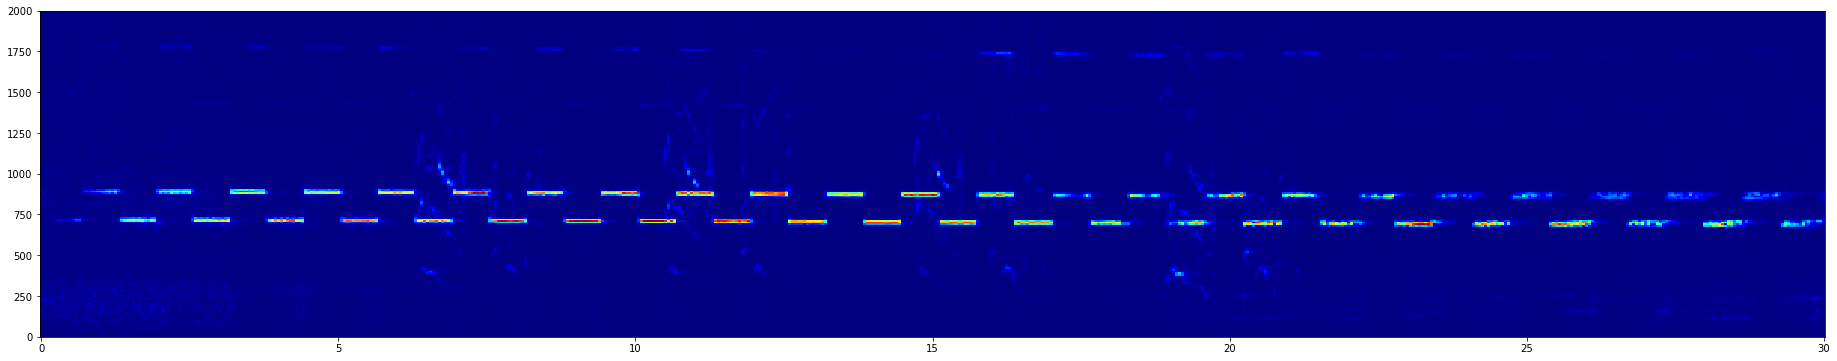

In [53]:
frq, t, Pxx = scipy.signal.stft(x, fs=48000, nperseg=4800, noverlap=2400) #周波数、時間、強さの3つの情報が帰ってくる

plt.figure(figsize=(32,6))
plt.ylim(0,2000)
plt.pcolormesh(t_ori, frq, np.abs(Pxx), cmap = 'jet')

In [ ]:
for i,d in enumerate(Pxx):
    if i%10 == 0:
        plt.figure(figsize=(32,6))
        plt.plot(np.abs(d))
        plt.show()


In [ ]:
np.abs(d[0])

In [ ]:
np.log(np.abs(Pxx[0][0]))

In [ ]:
np.abs(Pxx[0][0])

In [ ]:
Pxx[0][0]